In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# 데이터 불러오기
learn_csv_file = pd.read_csv('csv_files/learn_60percent.csv')
valid_csv_file = pd.read_csv('csv_files/valid_20percent.csv')
test_csv_file = pd.read_csv('csv_files/test_20percent.csv')

learn_csv_file = sklearn.utils.shuffle(learn_csv_file)
valid_csv_file = sklearn.utils.shuffle(valid_csv_file)

col = 34

learn_x = learn_csv_file.iloc[:,:col].values
learn_y = learn_csv_file.iloc[:,col:].values
valid_x = valid_csv_file.iloc[:,:col].values
valid_y = valid_csv_file.iloc[:,col:].values
test_x = test_csv_file.iloc[:,:col].values
test_y = test_csv_file.iloc[:,col:].values


# 표준화 : 사이킷런 사용 (Standard Scaling)
scaler = StandardScaler()
scaler.fit(learn_x)
learn_x_scaled = scaler.transform(learn_x)
valid_x_scaled = scaler.transform(valid_x)
test_x_scaled = scaler.transform(test_x)

# 표준화 (Standard Scaling)
# mean = learn_x.mean(axis=0)
# std = learn_x.std(axis=0)
# learn_x = (learn_x - mean) / std
# valid_x = (valid_x - mean) / std

# one-hot encoding
learn_y = tf.keras.utils.to_categorical(learn_y)
valid_y = tf.keras.utils.to_categorical(valid_y)
test_y = tf.keras.utils.to_categorical(test_y)

# 첫번째 모델
# 모델 구성 (multi-class classification)
model = Sequential()

# 은닉층 5개 / 출력층 4개
model.add(Dense(128, activation='relu', input_shape=(col,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

# 모델 training
after_data = model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = model.predict(test_x_scaled)
model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
model.save("trained_models/first_modeL_five_hidden_depth.h5")

2022-09-16 15:50:36.007777: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


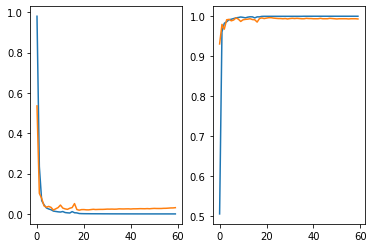

In [2]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(after_data.history['loss'])
plt.plot(after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(after_data.history['accuracy'])
plt.plot(after_data.history['val_accuracy'])
plt.show()

In [3]:
# 2번째 모델
# 모델 구성 (multi-class classification)
second_model = Sequential()

# 은닉층 1개, 1개의 층 / 출력층 4개
second_model.add(Dense(32, activation='relu', input_shape=(col,)))
second_model.add(Dense(4, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 training
second_after_data = second_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = second_model.predict(test_x_scaled)
second_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
second_model.save("trained_models/second_modeL_one_hidden_depth.h5")


Epoch 1/60
58/58 [==============================] - 0s 2ms/step - loss: 1.0140 - accuracy: 0.5983 - val_loss: 0.6034 - val_accuracy: 0.9177
Epoch 2/60
58/58 [==============================] - 0s 764us/step - loss: 0.4525 - accuracy: 0.9168 - val_loss: 0.3038 - val_accuracy: 0.9656
Epoch 3/60
58/58 [==============================] - 0s 779us/step - loss: 0.2722 - accuracy: 0.9453 - val_loss: 0.1977 - val_accuracy: 0.9698
Epoch 4/60
58/58 [==============================] - 0s 828us/step - loss: 0.1949 - accuracy: 0.9575 - val_loss: 0.1414 - val_accuracy: 0.9750
Epoch 5/60
58/58 [==============================] - 0s 807us/step - loss: 0.1517 - accuracy: 0.9653 - val_loss: 0.1093 - val_accuracy: 0.9812
Epoch 6/60
58/58 [==============================] - 0s 828us/step - loss: 0.1228 - accuracy: 0.9724 - val_loss: 0.0914 - val_accuracy: 0.9812
Epoch 7/60
58/58 [==============================] - 0s 695us/step - loss: 0.1039 - accuracy: 0.9748 - val_loss: 0.0797 - val_accuracy: 0.9828
Epoch 8/

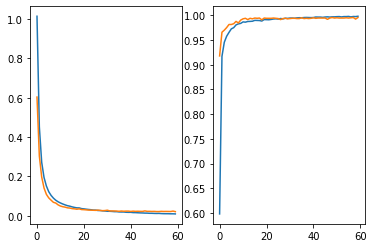

In [4]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(second_after_data.history['loss'])
plt.plot(second_after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(second_after_data.history['accuracy'])
plt.plot(second_after_data.history['val_accuracy'])
plt.show()

In [13]:
# 3번째 모델
# 모델 구성 (multi-class classification)
third_model = Sequential()

# 은닉층 노드 128개, 2개의 층 / 출력층 4개 / Dropout 비율 0.5
third_model.add(Dense(128, activation='relu', input_shape=(col,)))
third_model.add(Dropout(0.5))
third_model.add(Dense(128, activation='relu', input_shape=(col,)))
third_model.add(Dropout(0.5))
third_model.add(Dense(4, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
third_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 training
third_after_data = third_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = third_model.predict(test_x_scaled)
third_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
third_model.save("trained_models/third_model_two_hidden_depth.h5")



Epoch 1/60
58/58 [==============================] - 0s 3ms/step - loss: 0.7482 - accuracy: 0.7099 - val_loss: 0.2013 - val_accuracy: 0.9589
Epoch 2/60
58/58 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9023 - val_loss: 0.0996 - val_accuracy: 0.9760
Epoch 3/60
58/58 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9349 - val_loss: 0.0722 - val_accuracy: 0.9766
Epoch 4/60
58/58 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9524 - val_loss: 0.0565 - val_accuracy: 0.9854
Epoch 5/60
58/58 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9556 - val_loss: 0.0498 - val_accuracy: 0.9828
Epoch 6/60
58/58 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9608 - val_loss: 0.0472 - val_accuracy: 0.9828
Epoch 7/60
58/58 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9682 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 8/60
58/58 [==

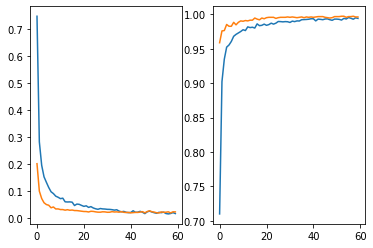

In [14]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(third_after_data.history['loss'])
plt.plot(third_after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(third_after_data.history['accuracy'])
plt.plot(third_after_data.history['val_accuracy'])
plt.show()

In [7]:
# 4번째 모델
# 모델 구성 (multi-class classification)
fourth_model = Sequential()

# 은닉층 노드 64개, 1개의 층 / 출력층 4개
fourth_model.add(Dense(64, activation='relu', input_shape=(col,)))
fourth_model.add(Dense(4, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
fourth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 training
fourth_after_data = fourth_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = fourth_model.predict(test_x_scaled)
fourth_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
fourth_model.save("trained_models/fourth_modeL_one_hidden_depth.h5")


Epoch 1/60
58/58 [==============================] - 0s 2ms/step - loss: 0.9328 - accuracy: 0.6865 - val_loss: 0.4573 - val_accuracy: 0.9297
Epoch 2/60
58/58 [==============================] - 0s 804us/step - loss: 0.3096 - accuracy: 0.9299 - val_loss: 0.2176 - val_accuracy: 0.9651
Epoch 3/60
58/58 [==============================] - 0s 694us/step - loss: 0.1942 - accuracy: 0.9538 - val_loss: 0.1462 - val_accuracy: 0.9740
Epoch 4/60
58/58 [==============================] - 0s 892us/step - loss: 0.1456 - accuracy: 0.9658 - val_loss: 0.1160 - val_accuracy: 0.9771
Epoch 5/60
58/58 [==============================] - 0s 919us/step - loss: 0.1169 - accuracy: 0.9717 - val_loss: 0.0927 - val_accuracy: 0.9812
Epoch 6/60
58/58 [==============================] - 0s 772us/step - loss: 0.0984 - accuracy: 0.9748 - val_loss: 0.0768 - val_accuracy: 0.9865
Epoch 7/60
58/58 [==============================] - 0s 693us/step - loss: 0.0846 - accuracy: 0.9795 - val_loss: 0.0662 - val_accuracy: 0.9880
Epoch 8/

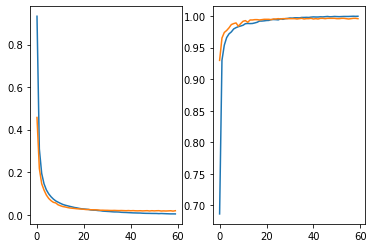

In [8]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(fourth_after_data.history['loss'])
plt.plot(fourth_after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(fourth_after_data.history['accuracy'])
plt.plot(fourth_after_data.history['val_accuracy'])
plt.show()

In [9]:
# 5번째 모델
# 모델 구성 (multi-class classification)
fifth_model = Sequential()

# 은닉층 노드 300개, 1개의 층 / 출력층 4개
fifth_model.add(Dense(300, activation='relu', input_shape=(col,)))
fifth_model.add(Dense(4, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
fifth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 training
fifth_after_data = fifth_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = fifth_model.predict(test_x_scaled)
fifth_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
fifth_model.save("trained_models/fifth_model_one_hidden_depth.h5")



Epoch 1/60
58/58 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8788 - val_loss: 0.1662 - val_accuracy: 0.9714
Epoch 2/60
58/58 [==============================] - 0s 828us/step - loss: 0.1368 - accuracy: 0.9694 - val_loss: 0.0858 - val_accuracy: 0.9859
Epoch 3/60
58/58 [==============================] - 0s 1ms/step - loss: 0.0877 - accuracy: 0.9799 - val_loss: 0.0601 - val_accuracy: 0.9917
Epoch 4/60
58/58 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9861 - val_loss: 0.0497 - val_accuracy: 0.9885
Epoch 5/60
58/58 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9884 - val_loss: 0.0366 - val_accuracy: 0.9948
Epoch 6/60
58/58 [==============================] - 0s 954us/step - loss: 0.0419 - accuracy: 0.9898 - val_loss: 0.0319 - val_accuracy: 0.9948
Epoch 7/60
58/58 [==============================] - 0s 769us/step - loss: 0.0357 - accuracy: 0.9913 - val_loss: 0.0303 - val_accuracy: 0.9917
Epoch 8/60
58/

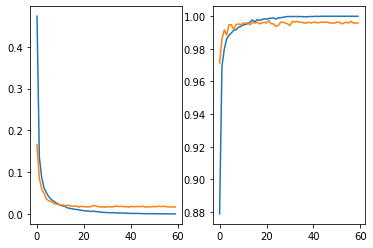

In [10]:
# 시각화
# 손실, 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(fifth_after_data.history['loss'])
plt.plot(fifth_after_data.history['val_loss'])
plt.subplot(1, 2, 2)
plt.plot(fifth_after_data.history['accuracy'])
plt.plot(fifth_after_data.history['val_accuracy'])
plt.show()